In [14]:
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
gfa = Table.read("/global/cfs/cdirs/desi/survey/GFA/offline_matched_coadd_ccds_main-thru_20241126.fits", hdu=2).to_pandas()

In [11]:

def select_expid_range(df, center_expid, range_width):
    """
    Select rows from a DataFrame where EXPID is within a range of a central value.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing an 'EXPID' column
    center_expid : int
        The central EXPID value
    range_width : int
        The number of EXPIDs to include on either side of the central value
        
    Returns:
    --------
    pandas.DataFrame
        Filtered DataFrame containing only rows where EXPID is within the specified range
    """
    # Calculate the range bounds
    lower_bound = center_expid - range_width
    upper_bound = center_expid + range_width
    
    # Filter the DataFrame
    mask = (df['EXPID'] >= lower_bound) & (df['EXPID'] <= upper_bound)
    return df[mask].copy()

In [32]:
center_expid = 263823  # Your central EXPID value
range_width = 7     # Number of EXPIDs to include on either side

gfa_subset = select_expid_range(gfa, center_expid, range_width)


Text(0.5, 1.0, 'Results from the GFA pipeline')

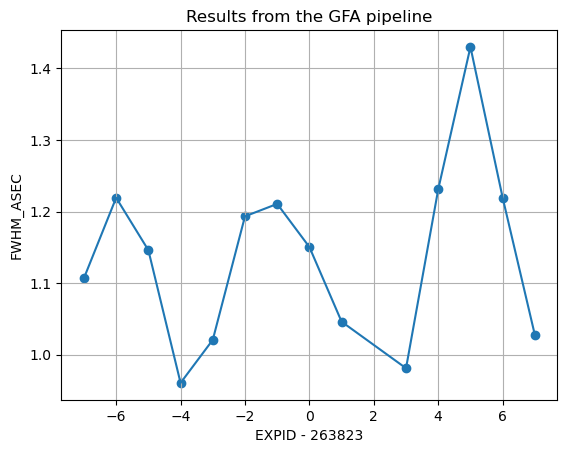

In [39]:
column = 'FWHM_ASEC'
plt.plot(gfa_subset['EXPID']-center_expid, gfa_subset[column])
plt.scatter(gfa_subset['EXPID']-center_expid, gfa_subset[column])
plt.grid()
plt.xlabel('EXPID - 263823')
plt.ylabel(column)
plt.title('Results from the GFA pipeline')

In [23]:
gfa_subset.keys()

Index(['EXPID', 'CUBE_INDEX', 'NIGHT', 'EXPTIME', 'FNAME_RAW', 'SKYRA',
       'SKYDEC', 'PROGRAM', 'MOON_ILLUMINATION', 'MOON_ZD_DEG', 'MOON_SEP_DEG',
       'KTERM', 'FRACFLUX_NOMINAL_POINTSOURCE', 'FRACFLUX_NOMINAL_ELG',
       'FRACFLUX_NOMINAL_BGS', 'MJD', 'FWHM_ASEC', 'TRANSPARENCY',
       'SKY_MAG_AB', 'FIBER_FRACFLUX', 'FIBER_FRACFLUX_ELG',
       'FIBER_FRACFLUX_BGS', 'AIRMASS', 'RADPROF_FWHM_ASEC', 'FIBERFAC',
       'FIBERFAC_ELG', 'FIBERFAC_BGS', 'MINCONTRAST', 'MAXCONTRAST'],
      dtype='object')

In [ ]:
keys